<a href="https://colab.research.google.com/github/miguelDeSaAdegas/machineLearning/blob/main/ExoVideoSemaine3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

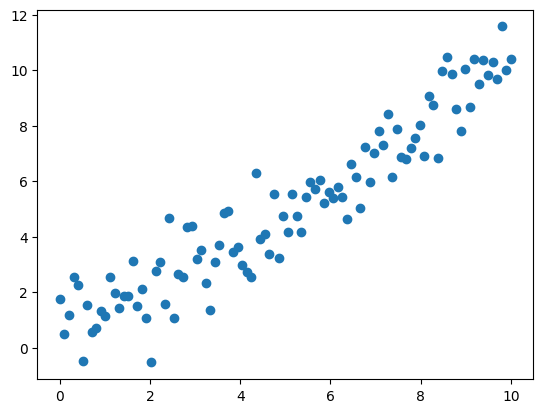

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression

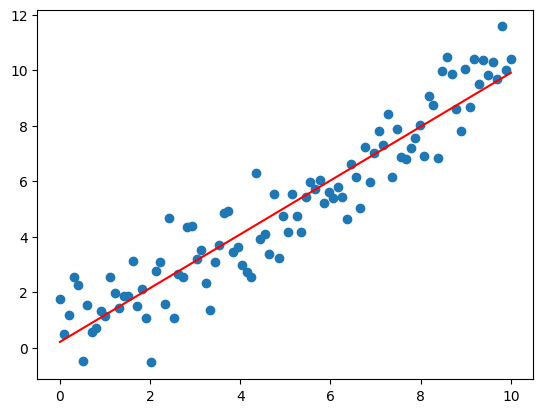

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predictions = model.predict(X)

plt.scatter(X,y)
plt.plot(X, predictions, c='r')

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()

In [ ]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [ ]:
model.fit(X, y)
model.score(X,y)

In [ ]:
model.predict(X)

In [ ]:
def survie(model, pclass=3, sex=0, age=22):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [ ]:
survie(model)

[0]
[[1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Video 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
print('Trains score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
val_score = []
for k in range(1, 50):
  score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
  val_score.append(score)

plt.plot(val_score)

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(estimator=model, X=X_train, y=y_train,
                                          param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': np.arange(1,20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

0.9833333333333334

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [ ]:
model = grid.best_estimator_

In [ ]:
model.score(X_test, y_test)

0.9333333333333333

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [ ]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


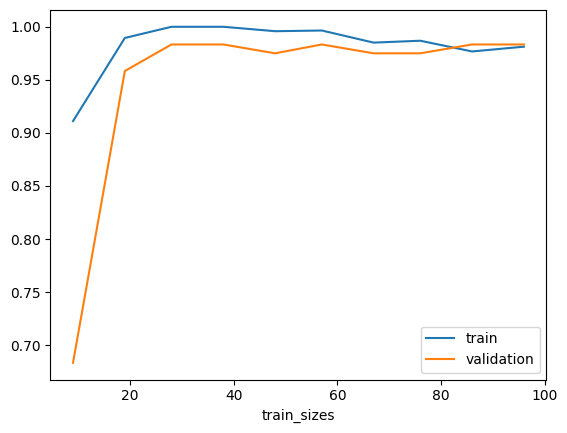

In [ ]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

**Video 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


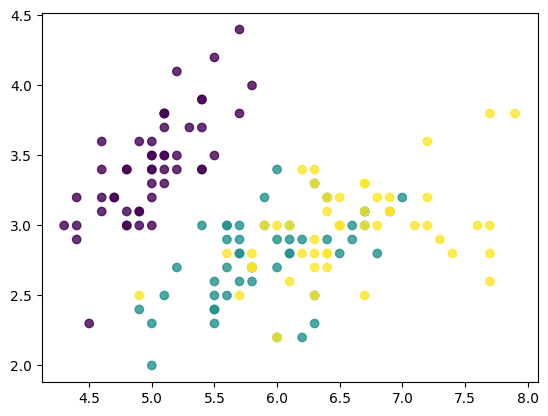

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, GroupKFold

In [ ]:
cv = GroupKFold(5).get_n_splits(X, y, groups=X[:, 0])
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])